In [1]:
import xarray as xr
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from cycler import cycler
import palettable

def _load(p):
    ds = xr.open_dataset(p)
    dv = ds.data_vars
    if 'pr' in dv:
        return dv['pr']
    elif 'PRECT' in dv:
        return dv['PRECT']
    else:
        raise IOError("Could not find pr or PRECT")
        
def mm2inches(x):
    return x * 0.0393701



In [2]:
import esmlab

In [19]:
#
# We have 3 pieces of information, each in its own file: zonal mean, quantiles, histogram
#
region_string = "tropical" # "nh_extratropics"  #  
p0 = Path("/Volumes/Glyph6TB/")
p1 = p0 / "CMIP6"
p2 = p0 / "cloud_locking"

conf1_exp1 = "aqua-p4K"
conf1_exp2 = "aqua-p4K-lwoff"
conf2_exp1 = "amip-p4K"
conf2_exp2 = "amip-p4K-lwoff"
# experiment2 = '4xCO2'

models = {"CESM2": (conf1_exp1, conf1_exp2, conf2_exp1, conf2_exp2),
         'CNRM-CM6-1': (conf1_exp1, conf1_exp2, conf2_exp1, conf2_exp2),
         'IPSL-CM6A-LR': (conf1_exp1, conf1_exp2, conf2_exp1, conf2_exp2), 
         'MRI-ESM2-0': (conf2_exp1, conf2_exp2)}

nx = 0
for m in models:
    for ex in models[m]:
        nx +=1 # total number of things in the plot

locking = {'f-cntl': 'F1850JJB_c201_CTL',
           'f-lock': 'F1850JJB_c201_CLOCK', 
           'c-cntl': 'B1850_c201_CTL',
           'c-lock': 'B1850_c201_CLOCK'}

use_member = {}
for m in models:
    if m == 'CNRM-CM6-1':
        use_member[m] = 'r1i1p1f2'
    else:
        use_member[m] = 'r1i1p1f1'

ZM = {}  # zonal mean
Q = {}  # quantiles
H = {}  # histogram
for m in models:
    ZM[m] = {}
    Q[m] = {}
    H[m] = {}
    for ex in models[m]:
        if ex not in list(locking.values()):
            ZM[m][ex] = (86400.) * _load(p1 / "zonal_mean" / f'pr_day_{m}_{ex}_{use_member[m]}_ocean.nc')
            Q[m][ex] = (86400.) * _load(p1 / "quantiles" / f'pr_day_{m}_{ex}_{use_member[m]}_{region_string}_ocean.nc')
            H[m][ex] = _load(p1 / "histograms" / f'pr_day_{m}_{ex}_{use_member[m]}_{region_string}_ocean.nc')
        else:
            # case for locking
            ZM[m][ex] = (86400.*1000.) * _load(p2 / "zonal_mean" / f'PRECT_day_{locking[ex]}_ocean.nc')
            Q[m][ex] = (86400.*1000.) * _load(p2 / "quantiles" / f'PRECT_day_{locking[ex]}_{region_string}_ocean.nc')
            H[m][ex] = _load(p2 / "histograms" / f'PRECT_day_{locking[ex]}_{region_string}_ocean.nc')


            
# pcolors = palettable.colorbrewer.qualitative.Paired_12.mpl_colors
pcolors = palettable.tableau.Tableau_20_r.mpl_colors
model_colors = {'CESM2' : {conf1_exp1:0, conf1_exp2:1, conf2_exp1:0, conf2_exp2:1, 'f-cntl':8, 'f-lock':9, 'c-cntl':10, 'c-lock':11},
                'CNRM-CM6-1': {conf1_exp1:2, conf1_exp2:3, conf2_exp1:2, conf2_exp2:3},
                'IPSL-CM6A-LR': {conf1_exp1:4, conf1_exp2:5, conf2_exp1:4, conf2_exp2:5},
                'MRI-ESM2-0': {conf2_exp1:6, conf2_exp2:7}}         

No handles with labels found to put in legend.


CESM2 aqua-p4K
0
CESM2 aqua-p4K-lwoff
1
CESM2 amip-p4K
0
CESM2 amip-p4K-lwoff
1
CNRM-CM6-1 aqua-p4K
2
CNRM-CM6-1 aqua-p4K-lwoff
3
CNRM-CM6-1 amip-p4K
2
CNRM-CM6-1 amip-p4K-lwoff
3
IPSL-CM6A-LR aqua-p4K
4
IPSL-CM6A-LR aqua-p4K-lwoff
5
IPSL-CM6A-LR amip-p4K
4
IPSL-CM6A-LR amip-p4K-lwoff
5
MRI-ESM2-0 amip-p4K
6
MRI-ESM2-0 amip-p4K-lwoff
7
112.03889135979036 2.0017801233031692e-05
53.85317525826239 0.00010025473434399584
86.96412948891556 4.170874269176239e-05
80.78082582169046 4.724340935192114e-05
77.07568910904239 6.600630827678624e-05
80.55132394842809 6.8020039502336e-05
102.50747744812982 3.973271614842174e-05
93.64059972278582 5.0886902923618306e-05
138.72856486961354 2.202835705717085e-05
60.96582868248295 4.115867528421549e-05
142.2901409044891 1.9680797957953204e-05
76.27684965804288 3.4430794410652394e-05
85.13531088307536 4.0093965318666775e-05
64.62337459512057 6.759157362623913e-05


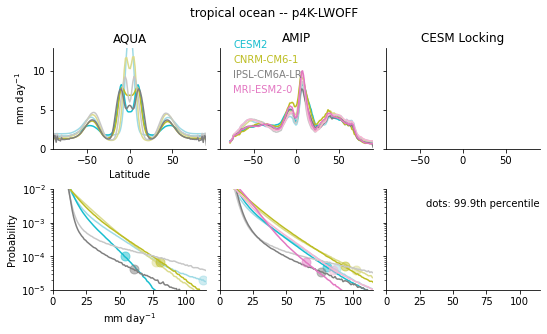

In [21]:

# I want to have 3 columns that show:
# |-- aqua --|-- amip --|-- lock --|

# 2 rows: zonal mean and histogram

fig, axx = plt.subplots(figsize=(mm2inches(190), mm2inches(115)), ncols=3, nrows=2, constrained_layout=True)
# [a.set_prop_cycle('color', palettable.colorbrewer.qualitative.Paired_12.mpl_colors) for a in axx.ravel()]

all_lines = []
line_holder = []  # to customize legend later
labl_holder  = []
ax = axx[0,:]
for m in ZM:
    leglabel = m
    for ex in ZM[m]:
        print(m,ex)
        xlat = ZM[m][ex]['lat']
        xzm = ZM[m][ex]
        if "aqua" in ex:
            panel = 0
        elif "amip" in ex:
            panel = 1
            labl_holder.append(leglabel)  # holds just the amip labels
        else:
            panel = 2
            leglabel = ex
        print(model_colors[m][ex])
        all_lines.append(ax[panel].plot(xlat, xzm, label=leglabel, color=pcolors[model_colors[m][ex]]))
        if panel == 1:
            line_holder.append(all_lines[-1][0])
[a.set_xlim([-90, 90]) for a in ax]
[a.set_ylim([0,13]) for a in ax]
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]
[a.set_yticklabels([]) for i, a in enumerate(ax) if i > 0 ]
titles = ["AQUA", "AMIP", "CESM Locking"]
[a.set_title(titles[i]) for i, a in enumerate(ax)]
ax[0].set_ylabel("mm day$^{-1}$")
ax[0].set_xlabel("Latitude")



ax = axx[1,:]
for m in H:
    for ex in H[m]:
        xlat = H[m][ex]['bins']
        y = H[m][ex]
        if "aqua" in ex:
            panel = 0
        elif "amip" in ex:
            panel = 1
        else:
            panel = 2
        ax[panel].plot(xlat, y, label=m, color=pcolors[model_colors[m][ex]])
        pct = Q[m][ex].sel(quantile=0.999).item()
        nearest_idx = np.abs(xlat - pct).argmin().item()
        ax[panel].plot(pct, y[nearest_idx], marker='o', color=pcolors[model_colors[m][ex]], markersize=9, alpha=0.5)
        print(pct, y[nearest_idx].item())
[a.semilogy() for a in axx[1,:]]
[a.spines['top'].set_visible(False) for a in ax]
[a.spines['right'].set_visible(False) for a in ax]
[a.set_ylim([1e-5,1e-2]) for a in ax]
[a.set_xlim([0,115]) for a in ax]
[a.set_yticklabels([]) for i, a in enumerate(ax) if i > 0 ]
ax[0].set_ylabel("Probability")
ax[0].set_xlabel("mm day$^{-1}$")
ax[-1].text(30, 3e-3, "dots: 99.9th percentile")

leg1 = axx[0,1].legend(line_holder[1::2], labl_holder[1::2], ncol=1, handlelength=0,frameon=False, loc=(.01,.5))
# # change the font colors to match the line colors:
for line,text in zip(leg1.get_lines(), leg1.get_texts()):
    text.set_color(line.get_color())


leg2 = axx[0,-1].legend(handlelength=0,frameon=False, ncol=2)
# change the font colors to match the line colors:
for line,text in zip(leg2.get_lines(), leg2.get_texts()):
    text.set_color(line.get_color())
    
fig.suptitle(f"{region_string} ocean -- p4K-LWOFF")
fig.savefig("/Users/brianpm/Dropbox/Manuscripts/M_cre_pex/atmPlus4KLWoff_precip_zonal_histogram.png", dpi=300, bbox_inches='tight')

In [18]:
model_colors

{'CESM2': {'aqua-p4K': 0,
  'aqua-p4K-lwoff': 1,
  'amip-p4K': 0,
  'amip-p4K-lwoff': 1,
  'f-cntl': 8,
  'f-lock': 9,
  'c-cntl': 10,
  'c-lock': 11},
 'CNRM-CM6-1': {'aqua-p4K': 2, 'aqua-p4K-lwoff': 3, 'amip-p4K-lwoff': 3},
 'IPSL-CM6A-LR': {'aqua-p4K': 4,
  'aqua-p4K-lwoff': 5,
  'amip-p4K': 4,
  'amip-p4K-lwoff': 5},
 'MRI-ESM2-0': {'amip-p4K': 6, 'amip-p4K-lwoff': 7}}

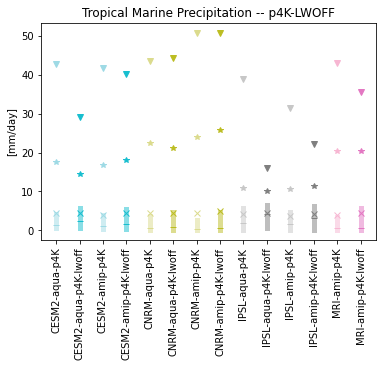

In [22]:
fig, ax = plt.subplots()
xpos = 1
xlab = []
for m in models:
    mnam = m.split('-')[0]
    for ex in Q[m]:
        exnam = ex
        if 'control' in exnam:
            exnam = exnam.replace('-control', '')
            print(mnam, exnam)
        ax.plot(xpos, Q[m][ex].sel(quantile=0.5), marker='_', color=pcolors[model_colors[m][ex]])
        ax.plot([xpos, xpos], [Q[m][ex].sel(quantile=0.25), Q[m][ex].sel(quantile=0.75)], color=pcolors[model_colors[m][ex]],
               linewidth=5, alpha=0.5)
        ax.plot(xpos, Q[m][ex].sel(quantile=0.95,method='nearest'), marker='*', color=pcolors[model_colors[m][ex]])
        ax.plot(xpos, Q[m][ex].sel(quantile=0.99, method='nearest'), marker='v', color=pcolors[model_colors[m][ex]])
        w = np.cos(np.radians((ZM[m][ex]['lat'])))
        a = esmlab.weighted_mean(ZM[m][ex].sel(lat=slice(-30,30)), dim=['lat'], weights=w.sel(lat=slice(-30,30)))
        ax.plot(xpos, a, marker='x', color=pcolors[model_colors[m][ex]])
        xpos += 1
        xlab.append("-".join([mnam,exnam]))
ax.set_xticks(np.arange(1, nx+1, 1))
ax.set_xticklabels(xlab, rotation=90)
xticks = ax.get_xticks()
ax.set_title("Tropical Marine Precipitation -- p4K-LWOFF")
ax.set_ylabel("[mm/day]")
fig.savefig("/Users/brianpm/Dropbox/Manuscripts/M_cre_pex/atmPlus4KLWoff_precip_quasiboxplot.png", dpi=300, bbox_inches='tight')